In [160]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import scipy.stats as stat
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [161]:
"""Synthetic data generation--- Final data will be availabe in X_train and Y_train"""

X_plus = np.random.multivariate_normal(np.array([1,1]), np.array([[1,0],[0,1]]), 300)   
X_minus = np.random.multivariate_normal(np.array([-1,1]), np.array([[1,0],[0,1]]), 300)
X_test_plus = X_plus[200:]
X_test_minus = X_minus[200:]
data_plus_train = [0,0,0,0]
data_minus_train = [0,0,0,0]
data_plus_test = [0,0,0,0]
data_minus_test = [0,0,0,0]
Y_train_plus = np.full((50),1)
Y_train_minus = np.full((50),-1) 
Y_test_plus = np.full((25),1)
Y_test_minus = np.full((25),-1)
X_train = [0,0,0,0]
X_test = [0,0,0,0]
Y_train = [0,0,0,0]
Y_test = [0,0,0,0]
for i in range(4):
    data_plus_train[i] = X_plus[i*50:(i+1)*50]
    data_minus_train[i] = X_minus[i*50:(i+1)*50]
    data_plus_test[i] = X_test_plus[i*25:(i+1)*25]
    data_minus_test[i] = X_test_minus[i*25:(i+1)*25]

for i in range(4):
    X_train[i] = np.concatenate((data_plus_train[i],data_minus_train[i]),axis = 0)
    X_test[i] = np.concatenate((data_plus_test[i],data_minus_test[i]),axis =0)
    Y_train[i] = np.concatenate((Y_train_plus,Y_train_minus),axis =0)
    Y_test[i] = np.concatenate((Y_test_plus,Y_test_minus),axis = 0)
    X_train[i] = np.concatenate((X_train[i],X_test[i]),axis = 0)
    Y_train[i] =np.concatenate((Y_train[i],Y_test[i]),axis = 0)
    
#Finally four datasets are created 
#X_train[i],Y_train[i],X_test[i], Y_test[i]---- i varies from 1 to 4

In [162]:
X_train[0].shape
Y_train[0].shape

(150,)

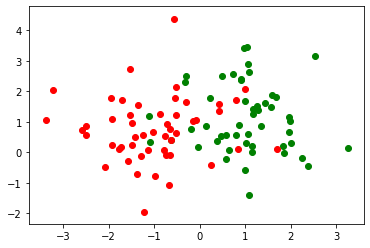

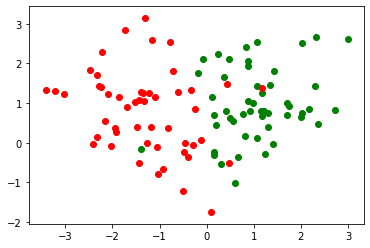

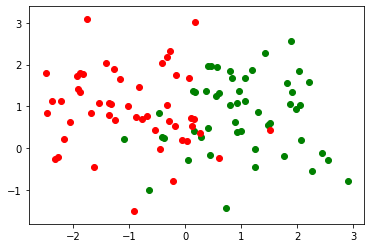

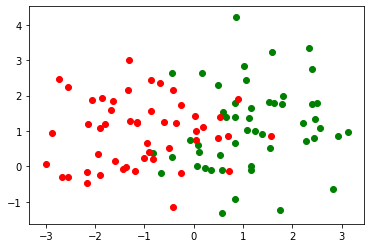

In [163]:
"""Plotting synthetic data generated"""
for i in range(4):
    X_plus_plot = data_plus_train[i].T
    X_minus_plot = data_minus_train[i].T
    plt.scatter(X_plus_plot[0],X_plus_plot[1],color = 'g')
    plt.scatter(X_minus_plot[0],X_minus_plot[1],color = 'r')
    plt.show()
    #X_plus_plot.shape
    


In [164]:
def calc_posterior(x,mu_plus,cov_plus,mu_minus,cov_minus,prior):
    """ Function that calculates P(Y = +1|X) by using bayes formula"""
    plus_prob = stat.multivariate_normal.pdf(x,mu_plus,cov_plus)
    minus_prob = stat.multivariate_normal.pdf(x,mu_minus,cov_minus)
    val = (prior*plus_prob)/((prior*plus_prob)+((1-prior)*minus_prob))
    return val

In [165]:
def sample_mean(A,length):
    """Function that returns sample mean of the given data"""
    return (np.sum(A,axis=0))/length

def sample_covariance(A, length, mu):
    """Function that returns sample covariance of the given data"""
    cov = np.array([[0,0],[0,0]])
    for x in A:
        y = np.array([x-mu])
        cov = cov + np.matmul(np.transpose(y),y)
        #print(cov)
    cov = cov/length
    return cov

In [166]:
X_plus = [0,0,0,0]
X_minus = [0,0,0,0]
mu_hat_plus = [0,0,0,0]
mu_hat_minus = [0,0,0,0]
cov_hat_plus = [0,0,0,0]
cov_hat_minus = [0,0,0,0]
prior = [0,0,0,0]
eta = [0,0,0,0]
Y_pred = [0,0,0,0]
for p in range(4):
    X_plus_temp = []
    X_minus_temp = []
    
    for i in range(int(X_train[p].shape[0])):
        if(Y_train[p][i] == 1):
            X_plus_temp.append(X_train[p][i])
        else:
            X_minus_temp.append(X_train[p][i])
    X_plus[p] = np.array(X_plus_temp)
    X_minus[p] = np.array(X_minus_temp)
    
    mu_hat_plus[p] = sample_mean(X_plus[p],X_plus[p].shape[0])
    mu_hat_minus[p] = sample_mean(X_minus[p],X_minus[p].shape[0])
    cov_hat_plus[p] = sample_covariance(X_plus[p],X_plus[p].shape[0],mu_hat_plus[p])
    cov_hat_minus[p] = sample_covariance(X_minus[p],X_minus[p].shape[0],mu_hat_minus[p] )
    
    len_plus = X_plus[p].shape[0]
    len_minus= X_minus[p].shape[0]
    prior[p] = len_plus /(len_plus + len_minus)
    eta_temp = []
    for i in range(X_train[p].shape[0]):
        eta_temp.append(calc_posterior(X_train[p][i],mu_hat_plus[p],cov_hat_plus[p],mu_hat_minus[p],cov_hat_minus[p],prior[p]))
    eta[p] = np.array(eta_temp)
    Y_pred_temp = []
    for i in range(X_train[p].shape[0]):
        Y_pred_temp.append(np.sign(eta[p][i]-0.5))
    Y_pred[p] = np.array(Y_pred_temp)
    print(accuracy_score(Y_train[p],Y_pred[p]))

0.8733333333333333
0.88
0.8333333333333334
0.8333333333333334


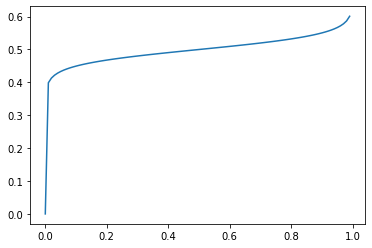

In [167]:
x = np.arange(0,1,0.01)
y = stat.beta.cdf(x,0.1,0.5)
alpha = np.arange(1,5,1)
beta = np.arange(1,5,1)
#for a in alpha:
#for b in beta:
y = stat.beta.cdf(x,0.05,0.05)
plt.plot(x,y)
plt.show()
#If we are put       


In [168]:
n, p = 10, .5  # number of trials, probability of each trial
s = np.random.binomial(1, 0.8, 1000)
# result of flipping a coin 10 times, tested 1000 times.
np.sum(s)

790

In [169]:
eta_list = []
eta_list.append(eta[0])       #correct labeller ---> no distortion caused
eta_list.append(0.7*eta[1] + 0.1)  # linear distortion
eta_list.append(stat.beta.cdf(eta[2],100,100))   #aggressive labeller
eta_list.append(stat.beta.cdf(eta[3],0.05,0.05))  # distortion based on alpha = 0.5 and beta = 0.5


In [170]:
Y_train_distort = []
for i in range(4):
    lis = []
    for p in eta_list[i]:
        res = (np.random.binomial(1,p,1) )
        if(res == 0): res = -1
        lis.append(res)
    lis = np.array(lis)
    Y_train_distort.append(lis)
Y_train_distort[0] = Y_train[0]  #doubt whether to put the same trainiing data or samples with eta(x)
Y_test_distort = [0,0,0,0]
#print(X_train[0].shape)
for i in range(4):
    Y_test_distort[i] = Y_train_distort[i][100:]
    Y_train_distort[i] = Y_train_distort[i][:100]
    X_test[i] = X_train[i][100:]
    X_train[i] = X_train[i][:100]
Y_test_distort[0].shape
X_test[0].shape
#X_train[0].shape

(50, 2)

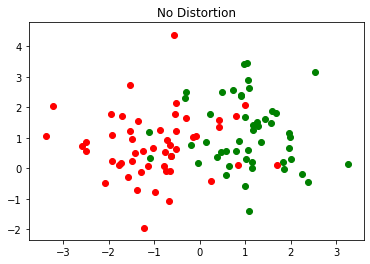

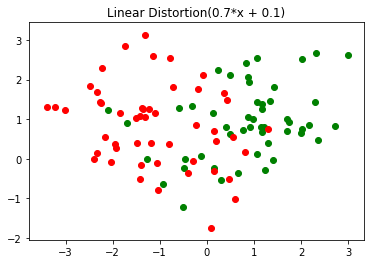

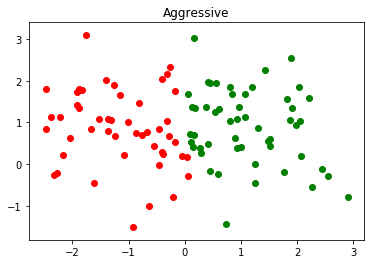

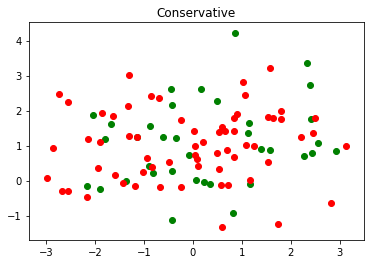

(100, 2)

In [171]:
titles = ['No Distortion', 'Linear Distortion(0.7*x + 0.1)', 'Aggressive', 'Conservative']
X_train_distort_plus = []
X_train_distort_minus = []
X_test_distort_plus = []
X_test_distort_minus = []
for i in range(4):
    lisplus = []
    lisminus = []
    j = 0
    for y in Y_train_distort[i]:
        if(y == 1):
            lisplus.append(X_train[i][j])
        else:
            lisminus.append(X_train[i][j])
        j = j + 1
    lisplus = np.array(lisplus)
    lisminus = np.array(lisminus)
    X_train_distort_plus.append(lisplus)
    X_train_distort_minus.append(lisminus)
for i in range(4):
    lisplus = []
    lisminus = []
    j = 0
    for y in Y_test_distort[i]:
        if(y == 1):
            lisplus.append(X_test[i][j])
        else:
            lisminus.append(X_test[i][j])
        j = j + 1
    lisplus = np.array(lisplus)
    lisminus = np.array(lisminus)
    X_test_distort_plus.append(lisplus)
    X_test_distort_minus.append(lisminus)
    

for i in range(4):
    plt.title(titles[i])
    plt.scatter(X_train_distort_plus[i].T[0],X_train_distort_plus[i].T[1],color = 'g')
    plt.scatter(X_train_distort_minus[i].T[0],X_train_distort_minus[i].T[1],color = 'r')
    plt.show()
    #plt.scatter(X_test_distort_plus[i].T[0],X_test_distort_plus[i].T[1],color = 'g')
    #plt.scatter(X_test_distort_minus[i].T[0],X_test_distort_minus[i].T[1],color = 'r')
    #plt.show()
X_train[0].shape

In [172]:
#Baseline-1
clf_list = []
accuracy_list = []
for i in range(4):
    Y_train_distort[i] =Y_train_distort[i].astype('int')
    Y_test_distort[i] =Y_test_distort[i].astype('int')
    clf = LogisticRegression(solver='lbfgs').fit(X_train[i], Y_train_distort[i])
    Y_pred = clf.predict(X_test[i])
    Y_pred = Y_pred.astype('int')
    print(Y_pred.shape)
    accuracy_list.append(accuracy_score(Y_test_distort[i],Y_pred))
accuracy_list
#Y_test_distort[0].shape

(50,)
(50,)
(50,)
(50,)


[0.9, 0.72, 1.0, 0.44]

In [173]:
Pairs_train = []
Ranks_train = []
for i in range(4):
    for j in range(X_train[i].shape[0]):
        for k in range(j+1,X_train[i].shape[0]):
            if(Y_train_distort[i][j] - Y_train_distort[i][k] == 2):
                Pairs_train.append([X_train[i][j][0],X_train[i][j][1],X_train[i][k][0],X_train[i][k][1]])
                Ranks_train.append(1)
            elif(Y_train_distort[i][j] - Y_train_distort[i][k] == -2):
                Pairs_train.append([X_train[i][j][0],X_train[i][j][1],X_train[i][k][0],X_train[i][k][1]])
                Ranks_train.append(-1)
Pairs_train = np.array(Pairs_train)
print(Pairs_train.shape)
Ranks_train = np.array(Ranks_train)
print(Ranks_train.shape)

(9800, 4)
(9800,)


In [174]:
Ranks_train = Ranks_train.astype('int')
final_clf = LogisticRegression(solver='lbfgs').fit(Pairs_train, Ranks_train)
final_clf.predict(np.array([[1,2,3,4]]))

array([-1])

In [175]:
accuracy2_list = []
Y_pred = []
for i in range(4):
    temp_pred = []
    for z in X_test[i]:
        a = 0          #indicates that z is more risky than 'a' people who were already detected as cancer
        b = 0          #indicaates that x is more risky than 'b' people who were detected safe
        prediction = 0
        for x1 in X_train_distort_plus[i]:
            if(int(final_clf.predict(np.array([[z[0],z[1],x1[0],x1[1]]]))) == 1):
                a = a + 1
        for x2 in X_train_distort_minus[i]:
            if(int(final_clf.predict(np.array([[z[0],z[1],x2[0],x2[1]]]))) == 1):
                b = b + 1
        if(a >= len(X_train_distort_plus[i])/2):
            prediction = 1
        elif(b <= len(X_train_distort_minus[i])/2):
            prediction = -1
        elif((a+b)/(len(X_train_distort_plus[i]) + len(X_train_distort_minus[i])) < 0.5):
            prediction = -1
        else:
            prediction = 1
        temp_pred.append(prediction)
    temp_pred = np.array(temp_pred)
    Y_pred.append(temp_pred)
    temp_pred = temp_pred.astype('int')
    accuracy2_list.append(accuracy_score(Y_test_distort[i],temp_pred))
            
accuracy2_list      

[0.88, 0.62, 0.88, 0.52]